In [1]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_digits

In [2]:
data = load_digits()

X, y = pd.DataFrame(data.data), pd.DataFrame(data.target)
X.shape, y.shape

((1797, 64), (1797, 1))

In [3]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=.1, random_state=7, stratify=y,
)

X_train.shape, y_train.shape, X_test.shape, y_test.shape

((1617, 64), (1617, 1), (180, 64), (180, 1))

In [4]:
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier(random_state=7)
clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=7)

In [5]:
y_pred = clf.predict(X_test)

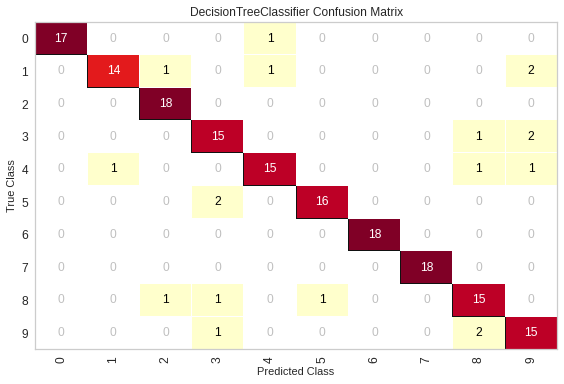

In [6]:
from sklearn.metrics import (
    confusion_matrix,
    accuracy_score,
    precision_score,
    recall_score
)

from yellowbrick.classifier import ConfusionMatrix

classes = list(range(0, 10))
cm = ConfusionMatrix(clf, classes=classes)
cm.fit(X_train, y_train)
cm.score(X_test, y_test)
cm.show()

In [7]:
confusion_matrix(y_test, y_pred)

array([[17,  0,  0,  0,  1,  0,  0,  0,  0,  0],
       [ 0, 14,  1,  0,  1,  0,  0,  0,  0,  2],
       [ 0,  0, 18,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 15,  0,  0,  0,  0,  1,  2],
       [ 0,  1,  0,  0, 15,  0,  0,  0,  1,  1],
       [ 0,  0,  0,  2,  0, 16,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0, 18,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 18,  0,  0],
       [ 0,  0,  1,  1,  0,  1,  0,  0, 15,  0],
       [ 0,  0,  0,  1,  0,  0,  0,  0,  2, 15]])

In [8]:
# classification repport
from sklearn.metrics import classification_report

matrix = classification_report(y_test, y_pred)
print(f'Classification report: \n {matrix}')


Classification report: 
               precision    recall  f1-score   support

           0       1.00      0.94      0.97        18
           1       0.93      0.78      0.85        18
           2       0.90      1.00      0.95        18
           3       0.79      0.83      0.81        18
           4       0.88      0.83      0.86        18
           5       0.94      0.89      0.91        18
           6       1.00      1.00      1.00        18
           7       1.00      1.00      1.00        18
           8       0.79      0.83      0.81        18
           9       0.75      0.83      0.79        18

    accuracy                           0.89       180
   macro avg       0.90      0.89      0.89       180
weighted avg       0.90      0.89      0.89       180



In [10]:
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

precision = precision_score(y_test, y_pred, average="micro")
print(f'Precision: {precision}')

recall = recall_score(y_test, y_pred, average="micro")
print(f'Recall: {recall}')

Accuracy: 0.8944444444444445
Precision: 0.8944444444444445
Recall: 0.8944444444444445


In [11]:
precision = precision_score(y_test, y_pred, average="macro")
print(f'Precision: {precision}')

recall = recall_score(y_test, y_pred, average="macro")
print(f'Recall: {recall}')

Precision: 0.8985810113519092
Recall: 0.8944444444444446
